In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [ ]:
data_frame = pd.read_csv('loan.csv')

In [ ]:
data_frame.head(-15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,LP002938,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y
595,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


In [ ]:
data_frame.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data_frame.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
data_frame = data_frame.dropna(subset=['Gender'])
data_frame = data_frame.dropna(subset=['Married'])
data_frame = data_frame.dropna(subset=['Self_Employed'])
data_frame = data_frame.dropna(subset=['Dependents'])
data_frame = data_frame.dropna(subset=['Credit_History'])

In [ ]:
data_frame.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,19
Loan_Amount_Term,12


In [ ]:
data_frame = data_frame.fillna({'LoanAmount': data_frame['LoanAmount'].mean()})
data_frame = data_frame.fillna({'Loan_Amount_Term': data_frame['Loan_Amount_Term'].mean()})

In [ ]:
data_frame.isnull().sum()


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
data_frame['Loan_Status'] = label_encoder.fit_transform(data_frame['Loan_Status'])
data_frame['Married'] = label_encoder.fit_transform(data_frame['Married'])
data_frame['Education'] = label_encoder.fit_transform(data_frame['Education'])
data_frame['Self_Employed'] = label_encoder.fit_transform(data_frame['Self_Employed'])
data_frame.replace({'Property_Area':{'Urban':2,'Rural':0,'Semiurban':1}},inplace=True)


In [ ]:
new_frame = pd.read_csv('loan.csv')
data_frame['Gender'] = new_frame['Gender']
data_frame.replace({'Gender':{'Male':1,'Female':0}},inplace=True)

In [ ]:
data_frame.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,144.136179,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,4,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [ ]:
data_frame['Dependents'].value_counts()

,count
Dependents,
0,294
2,88
1,85
3+,44


In [ ]:
data_frame = data_frame.replace(to_replace = '3+', value = 4)

<Axes: xlabel='Loan_Status', ylabel='count'>

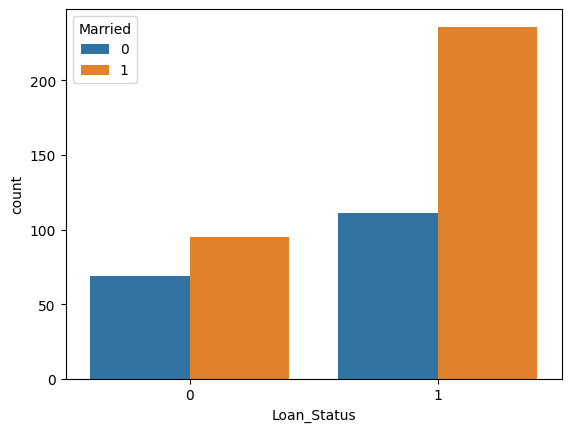

In [ ]:
sns.countplot(x='Loan_Status',hue='Married',data=data_frame)

<Axes: xlabel='Loan_Status', ylabel='count'>

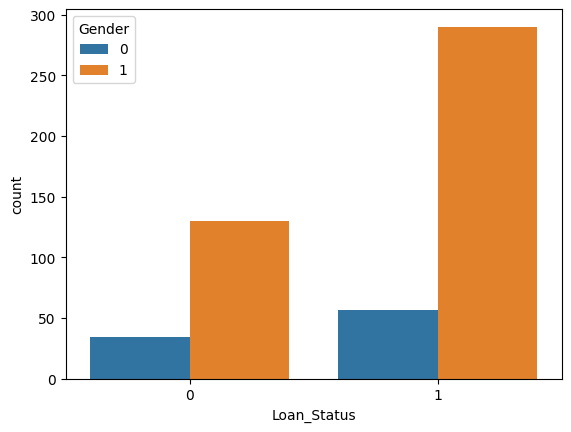

In [ ]:
sns.countplot(x='Loan_Status',hue='Gender',data=data_frame)

In [ ]:
X = data_frame.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = data_frame['Loan_Status']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
Y_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test_prediction,Y_test)
print(training_data_accuracy)
print(test_data_accuracy)

0.7908496732026143
0.8269230769230769


In [ ]:
new_data = {
    "Gender": 1, # Male
    "Married": 1, # Not Married
    "Dependents": 1,
    "Education": 0,  # Assuming encoded value for a specific education level
    "Self_Employed": 0,  # Not Self-Employed
    "ApplicantIncome": 12841,  # Replace with your desired income
    "CoapplicantIncome": 10968.0,  # Replace with your desired coapplicant income
    "LoanAmount": 340.000000,  # Replace with your desired loan amount
    "Loan_Amount_Term": 360.0,  # Replace with your desired loan term
    "Credit_History": 1.0, # Assuming encoded value for credit history
    "Property_Area": 1  # Assuming Urban area
}

new_data_df = pd.DataFrame.from_records([new_data])

# Predict using the SVM classifier
example_prediction = classifier.predict(new_data_df)

# Use if-else to print the result
if example_prediction[0] == 1:
  print("Prediction for example input: Loan Approved (1)")
else:
  print("Prediction for example input: Loan Not Approved (0)")


Prediction for example input: Loan Approved (1)


[1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1]
[0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1